Videos recomendados:
- Batch vs SGD: https://youtu.be/2p58rVgqsgo
- Mini-batch size: https://youtu.be/GrrO1NFxaW8
- Number of hidden units: https://youtu.be/IkGAIQH5wH8
- Learning rate: https://youtu.be/TwJ8aSZoh2U
- Learning rate 2: https://youtu.be/HLMjeDez7ps
- Overfitting: https://youtu.be/EeBZpb-PSac
- Overfitting 2: https://youtu.be/SVqEgaT1lXU
- Early Stopping: https://youtu.be/NnS0FJyVcDQ
- Regularization: https://youtu.be/aX_m9iyK3Ac
- Dropout: https://youtu.be/Ty6K6YiGdBs
- Dropout 2: https://youtu.be/6DcImJS8uV8
- Dropout 3: https://youtu.be/8nG8zzJMbZw
- Vanishing gradient: https://youtu.be/W_JJm_5syFw
- Other activatin functions: https://youtu.be/VzGOR5SlFSw
- Local minima: https://youtu.be/gF_sW_nY-xw
- Random restart: https://youtu.be/idyBBCzXiqg
- Momentum: https://youtu.be/r-rYz_PEWC8

# Overfitting en clasificación
<img src="images/classif_overfitting.png" alt="Drawing" style="width:60%;"/>

# Overfitting en regresión lineal
<img src="images/regress_overfitting.png" alt="Drawing" style="width:70%; "/>

# ¿Como se mide la performance de un algoritmo de apredizaje?
(Loss function, Objective function)


# <center>Regresion lineal (Media de error cuadratico): </center>
<center>$J(\theta) = \frac{1}{2m}\sum{_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]^2}$</center>

<center>$L = \sum{_{i=1}^n[f(x_i; w)-y_i]^2}$</center>
# <center>Regresion logistica (Clasificacion, Cross-entropy):</center>
<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]$</center>
# <center>Redes neuronales (Para clasificación):</center>
<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^m\sum{_{k=1}^K}y_k^{(i)}logh_\theta(x^{(i)})_k + (1-y_k^{(i)})log(1-h_\theta(x^{(i)})_k)}]$</center>

# <center>¿Cual es la $h_\theta(x^{(i)})$ en cada caso?</center>

# <center>Para simplifaciar escribiremos la función de esta forma en general:<center>
<center>$\huge L = ||\hat{y}-y_i||^2$</center>

# Notacion:
- $J(\theta)$ ó $L$: Loss function, objective function, cost function
- $x^{(i)}$: Mediciones, variables independientes, features, covariates. Es un vector de dimensión $d$, cada $i$ indica una medición diferente
- $y^{(i)}$: Salida, etiqueta, label, target. La salida $i$-esima corresponde a la entrada $i$-esima
- $m$ ó $n$: Cantidad de mediciones
- $\theta$ ó $w$: Parametros a estimar. Son un total de $d+1$
- $h_{\theta}(x^{(i)})$ ó $f(x_i;w)$: Salida de mi estimador
- $K$: Cantidad de salidas de la red neuronal

# Soluciones al overfitting
- Aumentar el tamaño del dataset: Buscar más datos o generarlo en forma artificial (Data augmentation)
- Reducir la cantidad de parametros
- Regularización
- Dropout (Solo para redes neuronales)

# Tamaño del dataset:
## AIC -> AICc: [wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion)
$AIC = 2k -2ln(\hat{L})$ Cantidad de muestras mucho mayor que $k^2$

$AICc = AIC + \frac{2k(k+1)}{n-k-1}$

k es la cantidad de parametros, $\hat{L}$ es el likelihood y n es el tamaño del dataset

## BIC: [wikipeedia](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
$BIC = ln(n)k - 2ln(\hat{L})$
## DIC: [wikipedia](https://en.wikipedia.org/wiki/Deviance_information_criterion) [pdf](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6208&rep=rep1&type=pdf)
DIC = log(P(X(i)) - 1/(M-1)SUM(log(P(X(all but i))

# Regularización

$$ \huge L = ||\hat{y}-y_i||^2 + \lambda g(w)$$

donde:

$\lambda > 0$ y $g(w)$ una funcion que penalizara ciertos valores de $w$

** Nota importante**: Normalmente estos modelos requieren normalización 

Ejemplo video Udacity:
https://youtu.be/aX_m9iyK3Ac
<img src="images/overfitting2points.png" alt="Drawing" style="width:60%;"/>

## Ridge regression -L2 regularization-
- Restringe los valores altos de $w$ todos por igual ($0.5^2 + 0.5^2 < 1^2+0^2$)
- Se pude demostrar que es un estimador polarizado de los w's, pero posee menor varianza que simplemente minimizar L
- $g(w) = \|w\|^2$ 

## LASSO (Least Absolute Shrinkage and Selection Operator) -L1 regularization- 
- Selector de parametros (Feature selection) - Puede tratar los pesos en forma independiente. Cuando un peso es cero, No importa la relación con el resto como en L2. Sí depende de la función de costo
- $g(w) = \|w\|$ 
- Sparse solution

## ElasticNet
-  Combinacion de L1 y L2

## Sparcity y LO regularization:

$w_{RR} = arg \min\| \hat{y}-y_i \|^2 + \lambda \|w\|^d$

- L0 cuenta la cantidad de $w$'s distinto de cero (d=0)
- Si d esta entre 0 y 1 aumenta la esparcibidad (sparsity) pero la funcion de costo no es convexa

## Batch normalization

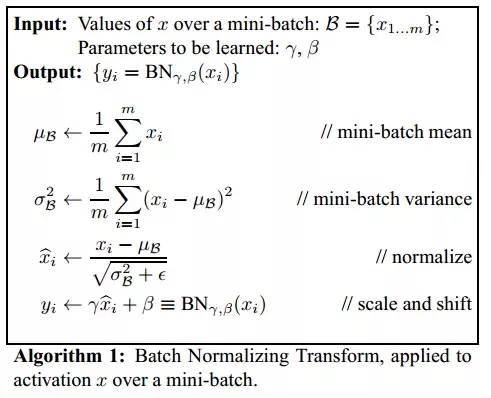

https://gab41.lab41.org/batch-normalization-what-the-hey-d480039a9e3b